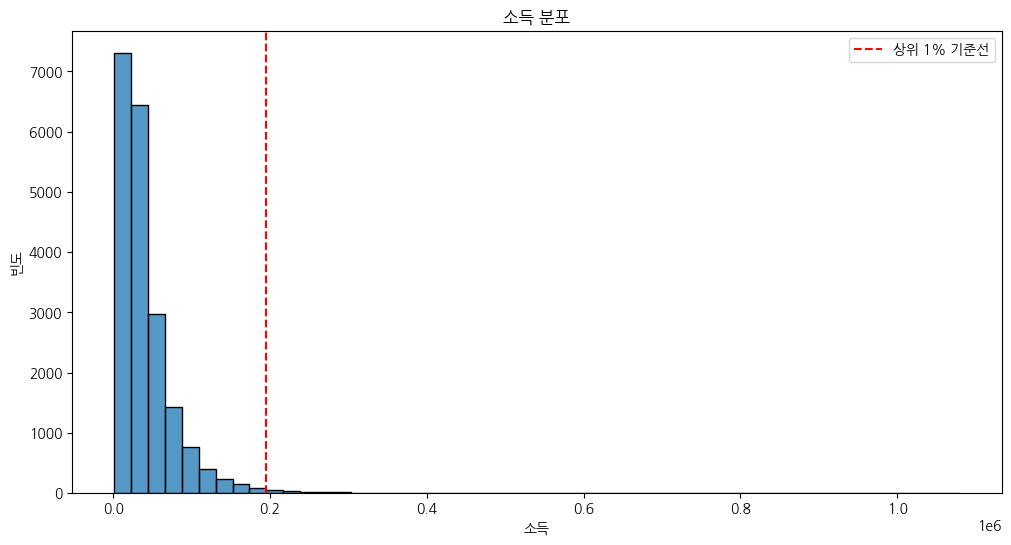

<Figure size 1500x800 with 0 Axes>

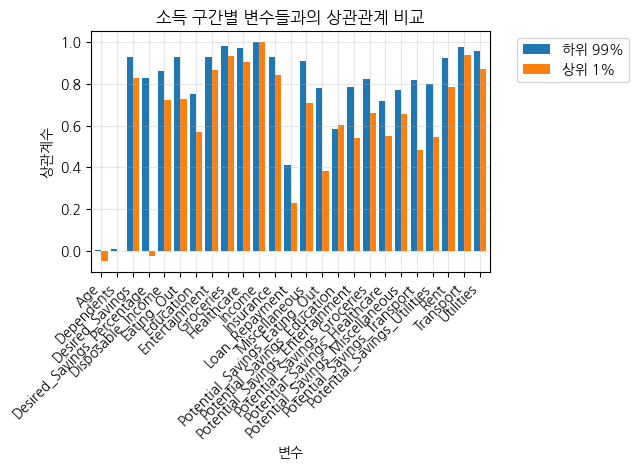

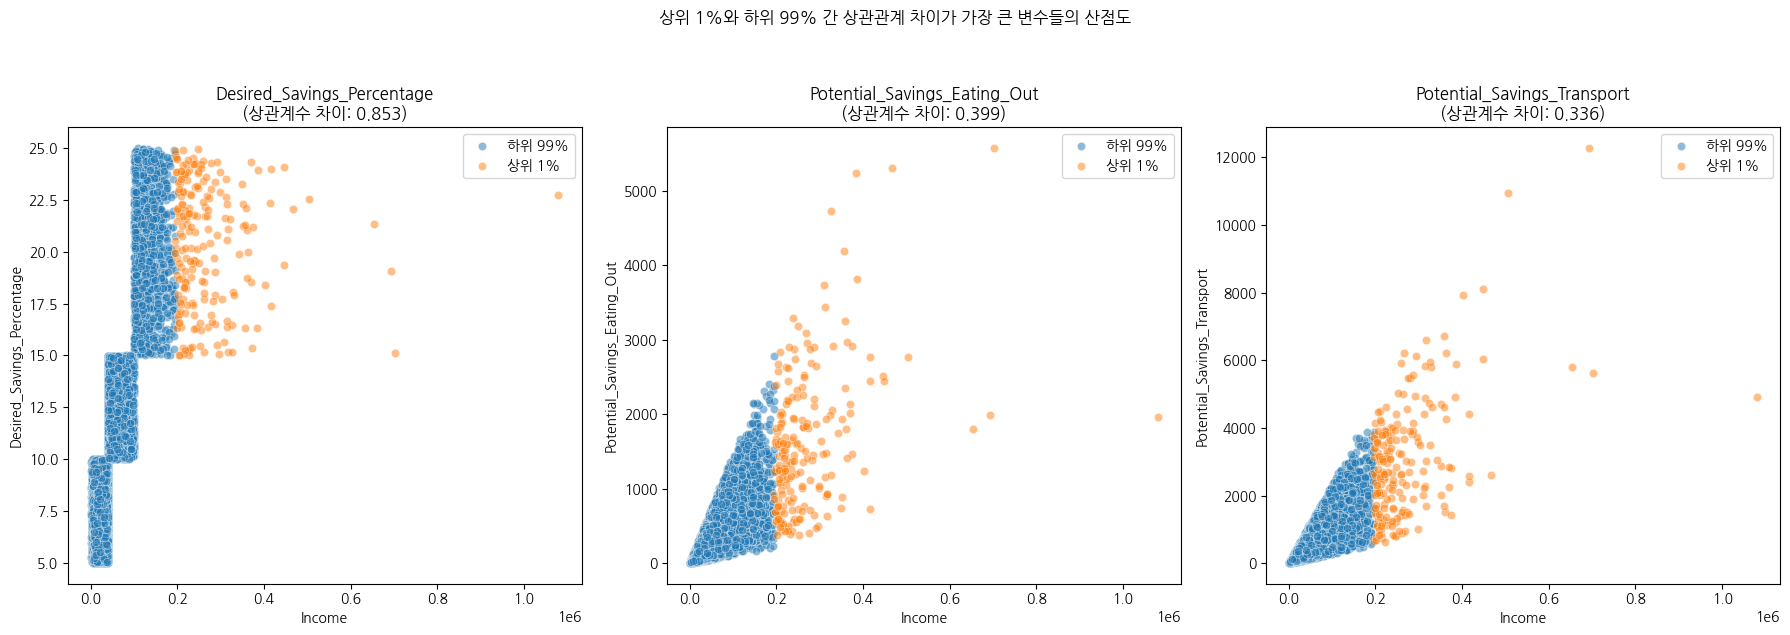

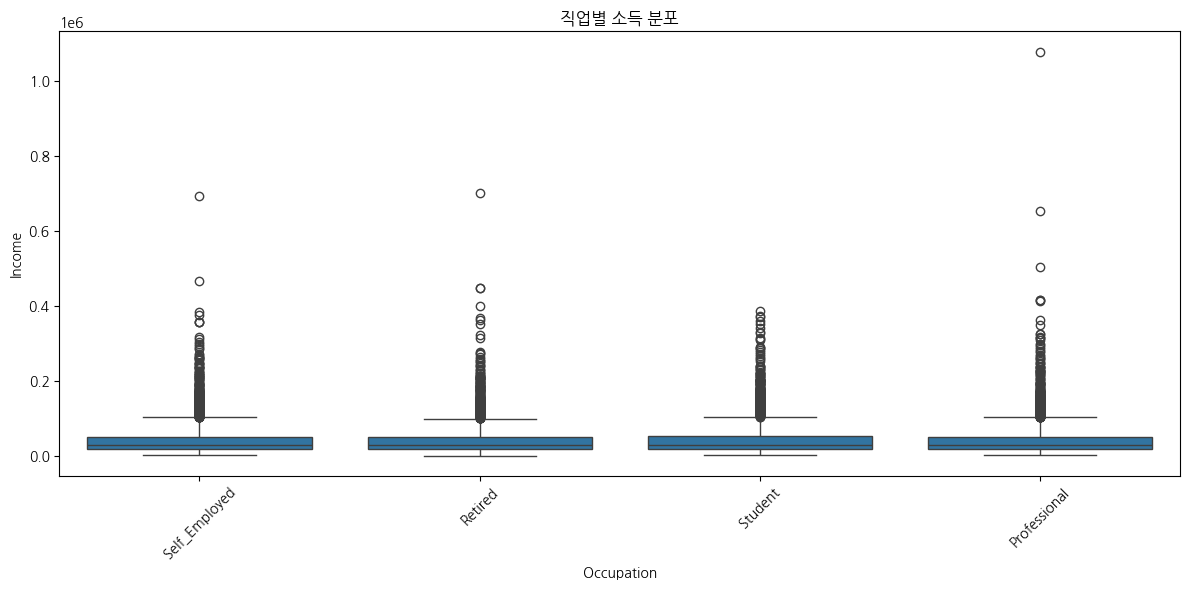

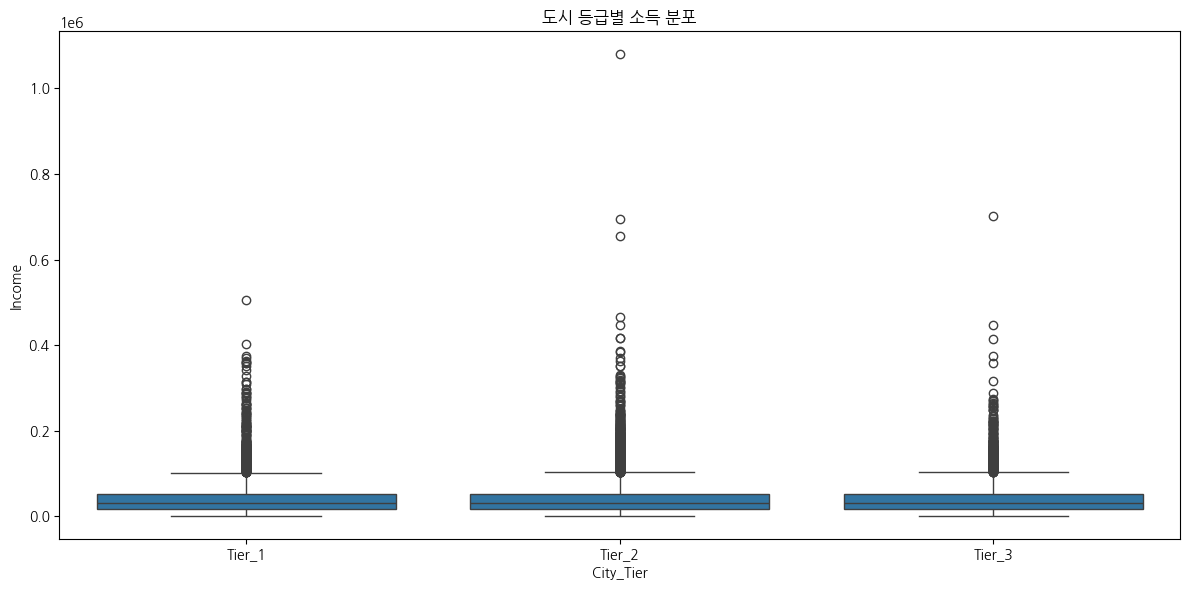

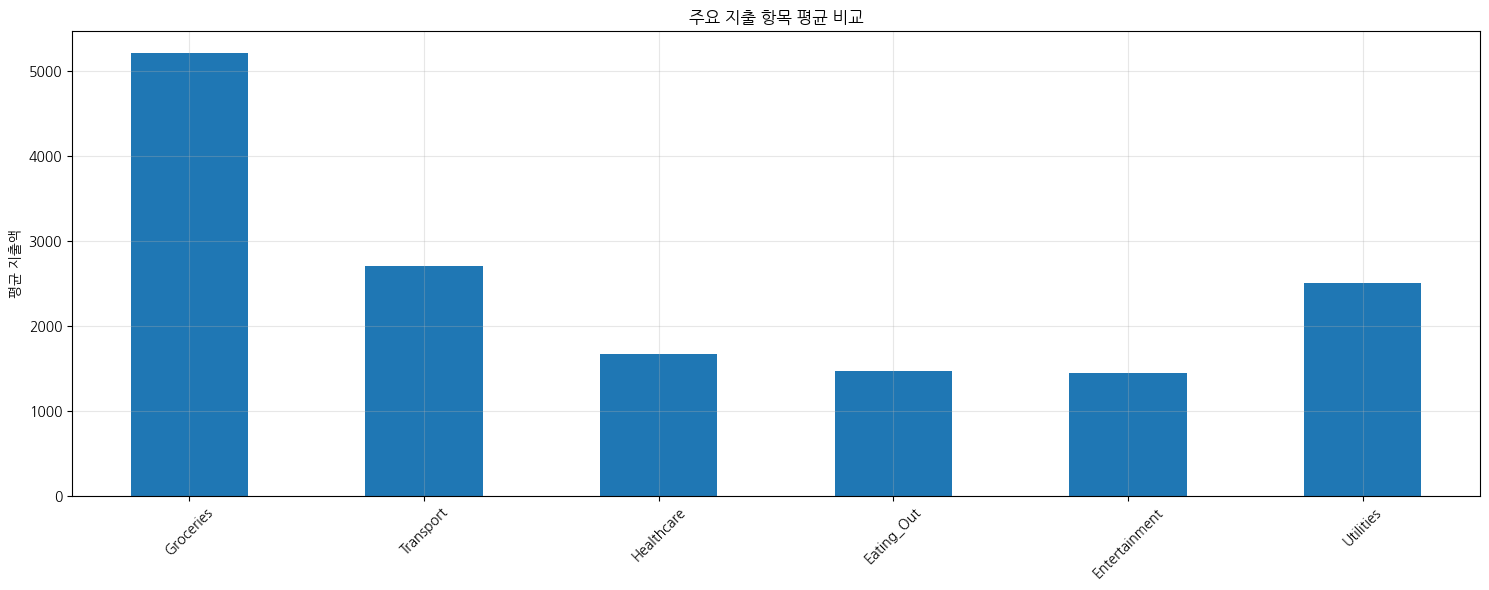

IndexError: index 6 is out of bounds for axis 0 with size 6

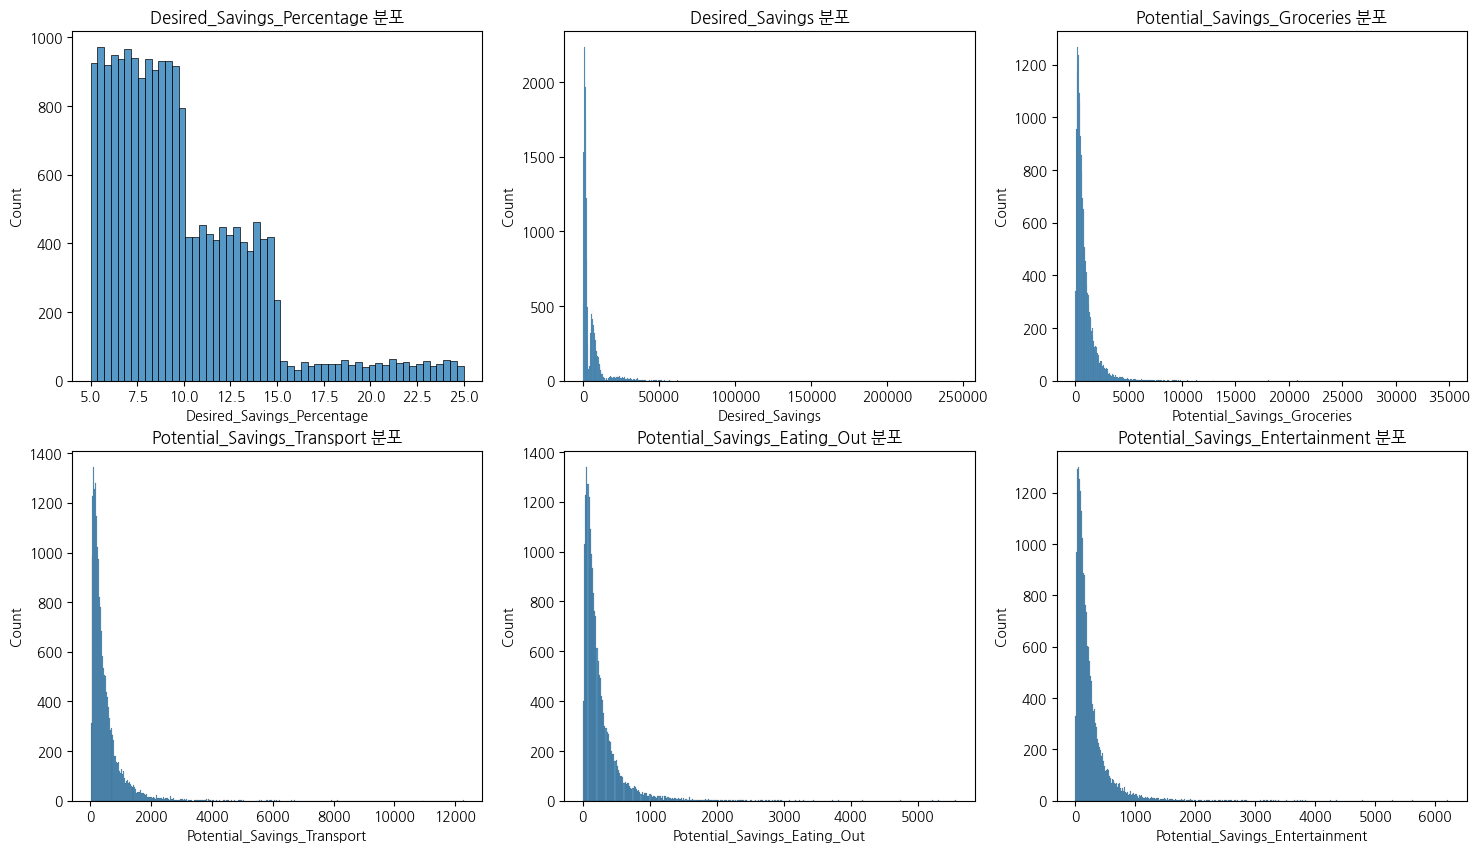

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('../../datasets/data.csv')

# 2. Income 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Income', bins=50)
plt.axvline(df['Income'].quantile(0.99), color='r', linestyle='--', label='상위 1% 기준선')
plt.title('소득 분포')
plt.xlabel('소득')
plt.ylabel('빈도')
plt.legend()
plt.show()

# 3. 상위 1%와 하위 99% 비교
percentile_99 = df['Income'].quantile(0.99)
columns_needed = [col for col in df.columns if col not in ['Occupation', 'City_Tier']]

lower_99_df = df[df['Income'] <= percentile_99][columns_needed]
upper_1_df = df[df['Income'] > percentile_99][columns_needed]

lower_99_corr = lower_99_df.corr()['Income'].sort_values(ascending=False)
upper_1_corr = upper_1_df.corr()['Income'].sort_values(ascending=False)
corr_diff = upper_1_corr - lower_99_corr

# 상관관계 비교 시각화
plt.figure(figsize=(15, 8))
comparison_df = pd.DataFrame({
    '하위 99%': lower_99_corr,
    '상위 1%': upper_1_corr
})

ax = comparison_df.plot(kind='bar', width=0.8)
plt.title('소득 구간별 변수들과의 상관관계 비교')
plt.xlabel('변수')
plt.ylabel('상관계수')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 상위 3개 차이 변수에 대한 산점도
top_3_diff = corr_diff.abs().sort_values(ascending=False)[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('상위 1%와 하위 99% 간 상관관계 차이가 가장 큰 변수들의 산점도', y=1.05)

for i, (var, diff) in enumerate(top_3_diff.items()):
    sns.scatterplot(data=lower_99_df, x='Income', y=var, alpha=0.5, label='하위 99%', ax=axes[i])
    sns.scatterplot(data=upper_1_df, x='Income', y=var, alpha=0.5, label='상위 1%', ax=axes[i])
    axes[i].set_title(f'{var}\n(상관계수 차이: {diff:.3f})')
    axes[i].set_xlabel('Income')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 5. 직업별 소득 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Income')
plt.title('직업별 소득 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. 도시 등급별 소득 분포
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City_Tier', y='Income')
plt.title('도시 등급별 소득 분포')
plt.tight_layout()
plt.show()

# 7. 주요 지출 항목 비교
expense_columns = ['Groceries', 'Transport', 'Healthcare', 'Eating_Out', 'Entertainment', 'Utilities']

plt.figure(figsize=(15, 6))
df[expense_columns].mean().plot(kind='bar')
plt.title('주요 지출 항목 평균 비교')
plt.ylabel('평균 지출액')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8. 저축 관련 변수들의 분포
saving_columns = [col for col in df.columns if 'Savings' in col]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(saving_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} 분포')

plt.tight_layout()
plt.show()

# 9. Income vs Disposable_Income 관계
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Disposable_Income', hue='City_Tier', alpha=0.6)
plt.title('소득과 가처분소득의 관계')
plt.tight_layout()
plt.show()

# 10. 상관관계 차이 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_diff.index, y=corr_diff.values)
plt.title('상위 1%와 하위 99% 간 상관관계 차이')
plt.xticks(rotation=45, ha='right')
plt.ylabel('상관계수 차이')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
